In [1]:
import pandas as pd
import os
from ast import literal_eval
from tqdm import tqdm
import numpy as np

import seaborn as sns

In [4]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [3]:
DATA_PATH = os.path.join(
    '..', '..', '..', "data", "frameworks_data", 'data_v0.7.1'
)

In [4]:
full_data = pd.read_csv(os.path.join(DATA_PATH, 'full_dataset_with_translations.csv'))
test_data = pd.read_csv(os.path.join(DATA_PATH, 'test_v0.7.1.csv'))
modified_age = pd.concat([
    pd.read_csv(os.path.join(DATA_PATH, 'train_v0.7.1_gender_snorkel.csv')),
    pd.read_csv(os.path.join(DATA_PATH, 'val_v0.7.1_gender_snorkel.csv'))
])
keyword_affected = pd.concat([
    pd.read_csv(os.path.join(DATA_PATH, 'train_0.7.1_keyword_affected_groups_level_3.csv')),
    pd.read_csv(os.path.join(DATA_PATH, 'val_0.7.1_keyword_affected_groups_level_3.csv'))
])
keyword_age = pd.concat([
    pd.read_csv(os.path.join(DATA_PATH, 'train_0.7.1_keyword_age.csv')),
    pd.read_csv(os.path.join(DATA_PATH, 'val_0.7.1_keyword_age.csv'))
])
keyword_gender = pd.concat([
    pd.read_csv(os.path.join(DATA_PATH, 'train_0.7.1_keyword_gender.csv')),
    pd.read_csv(os.path.join(DATA_PATH, 'val_0.7.1_keyword_gender.csv'))
])


/home/selim/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
full_data = pd.merge(
    right=full_data,
    left=modified_age,
    on='entry_id',
    how='right'
)
full_data = pd.merge(
    right=full_data,
    left=keyword_affected,
    on='entry_id',
    how='right'
)
full_data = pd.merge(
    right=full_data,
    left=keyword_age,
    on='entry_id',
    how='right'
)
full_data = pd.merge(
    right=full_data,
    left=keyword_gender,
    on='entry_id',
    how='right'
)

In [6]:
full_data.columns

Index(['entry_id', 'gender_kw_pred', 'age_kw_pred',
       'affected_groups_level_3_kw', 'gender_snorkel', 'excerpt',
       'analysis_framework_id', 'lead_id', 'project_id', 'verified', 'sectors',
       'subpillars_2d', 'subpillars_1d', 'geo_location',
       'specific_needs_groups', 'severity', 'info_date', 'reliability',
       'affected_groups_level_0', 'affected_groups_level_1',
       'affected_groups_level_2', 'affected_groups_level_3', 'age', 'gender',
       'source_type', 'url', 'website', 'lang', 'translation_en',
       'translation_fr', 'translation_es'],
      dtype='object')

In [7]:
full_data['sectors'] = full_data.sectors.apply(
    lambda x: [item for item in literal_eval(x) if item !='NOT_MAPPED']
)
full_data['subpillars_2d'] = full_data.subpillars_2d.apply(
    lambda x: [item for item in literal_eval(x) if item !='NOT_MAPPED']
)
full_data['subpillars_1d'] = full_data.subpillars_1d.apply(
    lambda x: [item for item in literal_eval(x) if item !='NOT_MAPPED']
)
full_data['pillars_1d'] = full_data.subpillars_1d.apply(
    lambda x: list(np.unique([item.split('->')[0] for item in x]))
               )
full_data['pillars_2d'] = full_data.subpillars_2d.apply(
    lambda x: list(np.unique([item.split('->')[0] for item in x]))
               )

In [8]:
#full_data['subpillars']

In [9]:
all_pillars_2d = list(np.unique(flatten(full_data['pillars_2d'])))
all_pillars_1d = list(np.unique(flatten(full_data['pillars_1d'])))
all_pillars = all_pillars_2d + all_pillars_1d
all_pillars_2d, all_pillars_1d, all_pillars

(['At Risk',
  'Capacities & Response',
  'Humanitarian Conditions',
  'Impact',
  'Priority Interventions',
  'Priority Needs'],
 ['Casualties',
  'Context',
  'Covid-19',
  'Displacement',
  'Humanitarian Access',
  'Information And Communication',
  'Shock/Event'],
 ['At Risk',
  'Capacities & Response',
  'Humanitarian Conditions',
  'Impact',
  'Priority Interventions',
  'Priority Needs',
  'Casualties',
  'Context',
  'Covid-19',
  'Displacement',
  'Humanitarian Access',
  'Information And Communication',
  'Shock/Event'])

In [10]:
for one_pillar in all_pillars_1d:
    full_data[one_pillar] = full_data.subpillars_1d.apply(
        lambda x: [item for item in x if one_pillar in item]
    )
    
for one_pillar in all_pillars_2d:
    full_data[one_pillar] = full_data.subpillars_2d.apply(
        lambda x: [item for item in x if one_pillar in item]
    )

In [11]:
"""full_data['sectors_pillars_2d'] = full_data.apply(
    lambda x: flatten(
        [[f"{level0}->{item}" for item in x[level0]] for level0 in ['sectors', 'pillars_2d']
    ]), axis=1
)"""

'full_data[\'sectors_pillars_2d\'] = full_data.apply(\n    lambda x: flatten(\n        [[f"{level0}->{item}" for item in x[level0]] for level0 in [\'sectors\', \'pillars_2d\']\n    ]), axis=1\n)'

In [12]:
#full_data['sectors_pillars_2d']

In [13]:
#prop of positive examples in that
#full_data['present_prim_tags'].apply(lambda x: len(x)>0).sum() / full_data.shape[0]

In [14]:
#full_data['present_prim_tags'].head()

In [15]:
"""full_data['subpillars_1d_part1'] = full_data.subpillars_1d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Displacement',
             'Context',
        ]
    ]
)

full_data['subpillars_1d_part2'] = full_data.subpillars_1d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Shock/Event',   
            'Humanitarian Access',
            'Casualties'
        ]
    ]
)

full_data['subpillars_1d_part3'] = full_data.subpillars_1d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Covid-19', 
            'Information And Communication',
        ]
    ]
)
"""

"full_data['subpillars_1d_part1'] = full_data.subpillars_1d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Displacement',\n             'Context',\n        ]\n    ]\n)\n\nfull_data['subpillars_1d_part2'] = full_data.subpillars_1d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Shock/Event',   \n            'Humanitarian Access',\n            'Casualties'\n        ]\n    ]\n)\n\nfull_data['subpillars_1d_part3'] = full_data.subpillars_1d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Covid-19', \n            'Information And Communication',\n        ]\n    ]\n)\n"

In [16]:
"""full_data['subpillars_2d_part1'] = full_data.subpillars_2d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Humanitarian Conditions',
             'Impact',
            'At Risk',
        ]
    ]
)

full_data['subpillars_2d_part2'] = full_data.subpillars_2d.apply(
    lambda x: [
        item for item in x if item.split('->')[0] in [
            'Capacities & Response',
            'Priority Interventions',  
            'Priority Needs', 
        ]
    ]
)
"""

"full_data['subpillars_2d_part1'] = full_data.subpillars_2d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Humanitarian Conditions',\n             'Impact',\n            'At Risk',\n        ]\n    ]\n)\n\nfull_data['subpillars_2d_part2'] = full_data.subpillars_2d.apply(\n    lambda x: [\n        item for item in x if item.split('->')[0] in [\n            'Capacities & Response',\n            'Priority Interventions',  \n            'Priority Needs', \n        ]\n    ]\n)\n"

In [17]:
"""print('subpillars_1d_first_part',
    len(list(set(flatten(full_data.subpillars_1d_part1)))),
      '\nsubpillars_1d_second_part',
      len(list(set(flatten(full_data.subpillars_1d_part2)))),
      '\nsubpillars_1d_third_part',
      len(list(set(flatten(full_data.subpillars_1d_part3)))),
      '\nsubpillars_2d_first_part',
      len(list(set(flatten(full_data.subpillars_2d_part1)))),
      '\nsubpillars_2d_second_part',
      len(list(set(flatten(full_data.subpillars_2d_part2))))
)"""

"print('subpillars_1d_first_part',\n    len(list(set(flatten(full_data.subpillars_1d_part1)))),\n      '\nsubpillars_1d_second_part',\n      len(list(set(flatten(full_data.subpillars_1d_part2)))),\n      '\nsubpillars_1d_third_part',\n      len(list(set(flatten(full_data.subpillars_1d_part3)))),\n      '\nsubpillars_2d_first_part',\n      len(list(set(flatten(full_data.subpillars_2d_part1)))),\n      '\nsubpillars_2d_second_part',\n      len(list(set(flatten(full_data.subpillars_2d_part2))))\n)"

[0, 1, 2, 3, 4]


Text(0.5, 1.0, '1d subpillars')

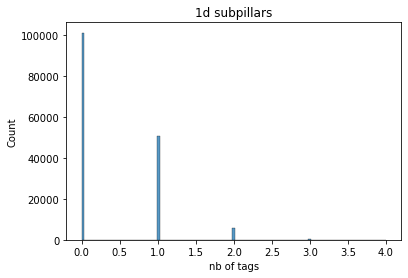

In [18]:
import matplotlib.pyplot as plt
flat_results = full_data.pillars_1d.apply(lambda x: len(x))
print(list(set(flat_results)))
sns.histplot(x=flat_results)
plt.xlabel('nb of tags')
plt.title('1d subpillars')

[0, 1, 2, 3, 4, 5]


Text(0.5, 1.0, '2d subpillars')

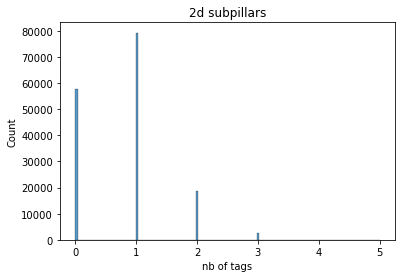

In [19]:
flat_results = full_data.pillars_2d.apply(lambda x: len(x))
print(list(set(flat_results)))
sns.histplot(x=flat_results)
plt.xlabel('nb of tags')
plt.title('2d subpillars')

['Covid-19', 'Shock/Event', 'Casualties', 'Humanitarian Access', 'Context', 'Information And Communication', 'Displacement']


<AxesSubplot:xlabel='Count'>

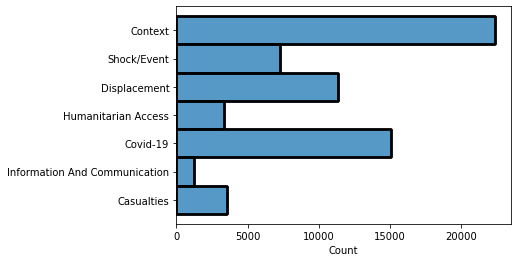

In [20]:
flat_results = flatten(full_data['pillars_1d'])
print(list(set(flat_results)))
sns.histplot(y=flat_results)

['Capacities & Response', 'Humanitarian Conditions', 'Impact', 'Priority Interventions', 'Priority Needs', 'At Risk']


<AxesSubplot:xlabel='Count'>

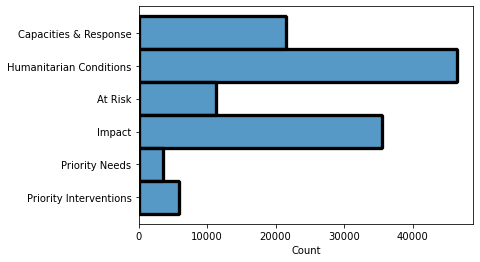

In [21]:
flat_results = flatten(full_data['pillars_2d'])
print(list(set(flat_results)))
sns.histplot(y=flat_results)

In [22]:
"""full_data['subpillars_2d_part1'] = full_data.subpillars_2d.apply(
    lambda x: [
        item for item in x if item in [
            'Humanitarian Conditions->Living Standards',
             'Humanitarian Conditions->Physical And Mental Well Being',
             'Impact->Impact On Systems, Services And Networks',
             'Capacities & Response->International Response',
             'Impact->Driver/Aggravating Factors',
             'Impact->Impact On People',
             'At Risk->Risk And Vulnerabilities'
        ]
    ]
)"""

"full_data['subpillars_2d_part1'] = full_data.subpillars_2d.apply(\n    lambda x: [\n        item for item in x if item in [\n            'Humanitarian Conditions->Living Standards',\n             'Humanitarian Conditions->Physical And Mental Well Being',\n             'Impact->Impact On Systems, Services And Networks',\n             'Capacities & Response->International Response',\n             'Impact->Driver/Aggravating Factors',\n             'Impact->Impact On People',\n             'At Risk->Risk And Vulnerabilities'\n        ]\n    ]\n)"

In [23]:
def custom_eval(x):
    if str(x)=='nan':
        return []
    if str(x)=='[None]':
        return []
    if type(x)==list:
        return x
    else:
        return literal_eval(x)
    
full_data['affected_groups'] = full_data['affected_groups_level_0']

In [24]:
full_data = full_data.rename(columns={
    'age': 'age_original',
    'gender': 'gender_original',
    'affected_groups_level_3': 'affected_groups_level_3_original'
})

In [25]:
cols = ['gender_kw_pred', 'age_kw_pred',
       'affected_groups_level_3_kw', 'age_original', 'gender_original', 
        'affected_groups_level_3_original', 'gender_snorkel', 'specific_needs_groups']
for col in cols:
    full_data[col] = full_data[col].apply(
       lambda x: [f"{col}->{item}" for item in custom_eval(x)]
    )

In [26]:
full_data.specific_needs_groups

0         [specific_needs_groups->Pregnant or Lactating ...
1                                                        []
2                                                        []
3                                                        []
4                                                        []
                                ...                        
158309                                                   []
158310                                                   []
158311                                                   []
158312                                                   []
158313     [specific_needs_groups->Persons with Disability]
Name: specific_needs_groups, Length: 158314, dtype: object

In [27]:
full_data['severity'] = full_data.severity.apply(
    lambda x: [f'severity->{item}' for item in custom_eval(x) if item !='NOT_MAPPED']
)

full_data['subpillars'] = full_data.apply(
    lambda x: x.subpillars_1d + x.subpillars_2d, axis=1
)

full_data['secondary_tags'] = full_data.apply(
    lambda x:x.severity + x.gender_kw_pred + x.age_kw_pred +\
                x.affected_groups_level_3_kw + x.specific_needs_groups, axis=1
)

In [28]:
full_data['present_age'] = full_data.apply(
    lambda x: [column for column in [
        'age_original',
        'age_kw_pred'] if len(custom_eval(x[column]))>0], axis=1
               )
full_data['present_gender'] = full_data.apply(
    lambda x: [column for column in [
        'gender_original',
        'gender_snorkel', 'gender_kw_pred'
    ] if len(custom_eval(x[column]))>0], axis=1
               )
full_data['present_affected_groups_level_3'] = full_data.apply(
    lambda x: [column for column in [
        'affected_groups_level_3_original',
        'affected_groups_level_3_kw'] if len(custom_eval(x[column]))>0], axis=1
               )

In [29]:
affected_groups_level_2_3_merger = {
    'Asylum Seekers': 'Displaced->Asylum Seekers', 
    'Host': 'Non Displaced->Host', 
    'Non Host': 'Non Displaced->Non Host',
    'IDP': 'Displaced->IDP', 
    'In Transit': 'Displaced->In Transit', 
    'Migrants': 'Displaced->Migrants',
    'NOT_MAPPED': 'NOT_MAPPED',
    'Others of Concern': 'Displaced->Others of Concern', 
    'Pendular': 'Displaced->Pendular',
    'Permanent': 'Displaced->Permanent', 
    'Refugees': 'Displaced->Refugees', 
    'Returnees': 'Displaced->Returnees', 
    'Stateless': 'Displaced->Stateless'
}

In [30]:
"""def custom_eval(x):
    if type(x)==list:
        return x
    else:
        return literal_eval(x)
    
full_data['affected_groups_level_3_nona'] = full_data['affected_groups_level_3'].apply(
    lambda x: [] if str(x)=='nan' else x
)
full_data['affected_groups_levels_2_3'] = full_data['affected_groups_level_3_nona'].\
apply(
    lambda x: [affected_groups_level_2_3_merger[item] for item in custom_eval(x) if item!='None']
)"""

"def custom_eval(x):\n    if type(x)==list:\n        return x\n    else:\n        return literal_eval(x)\n    \nfull_data['affected_groups_level_3_nona'] = full_data['affected_groups_level_3'].apply(\n    lambda x: [] if str(x)=='nan' else x\n)\nfull_data['affected_groups_levels_2_3'] = full_data['affected_groups_level_3_nona'].apply(\n    lambda x: [affected_groups_level_2_3_merger[item] for item in custom_eval(x) if item!='None']\n)"

In [31]:
"""np.unique(flatten(full_data.affected_groups_level_0.dropna().apply(literal_eval).tolist()))
np.unique(flatten(full_data.affected_groups_level_1.dropna().apply(literal_eval).tolist()))
np.unique(flatten(full_data.affected_groups_level_2.dropna().apply(literal_eval).tolist()))
np.unique(flatten(full_data['affected_groups_levels_2_3'].apply(custom_eval).tolist()))"""

"np.unique(flatten(full_data.affected_groups_level_0.dropna().apply(literal_eval).tolist()))\nnp.unique(flatten(full_data.affected_groups_level_1.dropna().apply(literal_eval).tolist()))\nnp.unique(flatten(full_data.affected_groups_level_2.dropna().apply(literal_eval).tolist()))\nnp.unique(flatten(full_data['affected_groups_levels_2_3'].apply(custom_eval).tolist()))"

In [32]:
full_data['present_tags'] = full_data.apply(
    lambda x: [column for column in [
        'sectors','pillars_2d', 'pillars_1d', 'affected_groups_level_3_kw',
        'gender_kw_pred', 'age_kw_pred', 'specific_needs_groups'
    ] if len(x[column])>0], axis=1
               )

In [33]:
train_val_full = full_data[~full_data.entry_id.isin(test_data.entry_id)]


In [34]:
fr_df = train_val_full[['entry_id', 'translation_fr']]\
        .rename(columns={'translation_fr':'excerpt'}).dropna()
en_df = train_val_full[['entry_id', 'translation_en']]\
        .rename(columns={'translation_en':'excerpt'}).dropna()
es_df = train_val_full[['entry_id', 'translation_es']]\
        .rename(columns={'translation_es':'excerpt'}).dropna()

augmented_data = pd.concat([en_df, fr_df, es_df])

In [35]:
augmented_data = pd.merge(
    right=train_val_full.drop(columns=[
        'excerpt', 'translation_en', 'translation_fr', 'translation_es']
                           ),
    left=augmented_data[['entry_id', 'excerpt']],
    on='entry_id',
    how='right'
)

In [36]:
train_val_df = pd.concat([train_val_full, augmented_data]).drop(columns=[
        'translation_en', 'translation_fr', 'translation_es', 'lang']
                           )

In [37]:
train_val_df.to_csv(os.path.join(DATA_PATH, 'new_columns_train_val.csv'), index=None)

In [38]:
"""test_df = full_data[full_data.entry_id.isin(test_data.entry_id)].drop(
    columns=['translation_en', 'translation_fr', 'translation_es']
)
test_df['gender_snorkel'] = test_df['gender']
test_df.to_csv(os.path.join(DATA_PATH, 'new_columns_test_v0.7.1.csv'), index=None)"""

"test_df = full_data[full_data.entry_id.isin(test_data.entry_id)].drop(\n    columns=['translation_en', 'translation_fr', 'translation_es']\n)\ntest_df['gender_snorkel'] = test_df['gender']\ntest_df.to_csv(os.path.join(DATA_PATH, 'new_columns_test_v0.7.1.csv'), index=None)"

In [39]:
train_val_df.shape

(436829, 49)

In [40]:
test_df.shape

NameError: name 'test_df' is not defined

In [ ]:
train_val_df.columns

In [ ]:
columns = ['present_prim_tags',
           'sectors',
           'pillars_2d',
           'pillars_1d', 
           'subpillars_2d_part1', 
           'subpillars_2d_part2', 'subpillars_1d_part1', 
           'subpillars_1d_part2', 'subpillars_1d_part3', 
           'severity']

dict_cols = {}
for col in columns:
    unique_tags = list(set(flatten(full_data[col].tolist())))
    dict_cols[col] = unique_tags

In [ ]:
dict_cols

In [46]:
DATA_PATH = os.path.join(
    '..', '..', '..', "data", "frameworks_data", 'data_v0.7.1'
)
train_val_df = pd.read_csv(os.path.join(DATA_PATH, 'new_columns_train_val.csv'))

/home/selim/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
train_val_df['subpillars_and_secondary_tags'] = train_val_df['subpillars_and_secondary_tags'].apply(str)
ids = train_val_df.groupby('subpillars_and_secondary_tags')['entry_id'].agg(list).values
unique_ids = [list(np.unique(list_)) for list_ in ids]

In [47]:
train_val_df.secondary_tags

0                                                        []
1                                                        []
2         ['severity->Of Concern', 'affected_groups_leve...
3         ['severity->Major', 'age_kw_pred->Children/You...
4                                  ['severity->Of Concern']
                                ...                        
436824    ['age_kw_pred->Children/Youth (5 to 17 years o...
436825    ['gender_kw_pred->Female', 'gender_kw_pred->Ma...
436826    ['gender_kw_pred->Female', 'gender_kw_pred->Ma...
436827    ['specific_needs_groups->Persons with Disabili...
436828    ['specific_needs_groups->Persons with Disabili...
Name: secondary_tags, Length: 436829, dtype: object

In [2]:
DATA_PATH = os.path.join(
    '..', '..', '..', "data", "frameworks_data", 'data_v0.7.1'
)

tot_df = pd.read_csv(os.path.join(DATA_PATH, 'new_columns_train_val.csv')).drop_duplicates()
test_df = pd.read_csv(os.path.join(DATA_PATH, 'new_columns_test_v0.7.1.csv'))

/home/selim/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/selim/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
', '.join(list(set(flatten(tot_df.secondary_tags.apply(literal_eval).apply(
    lambda t: [x.split('->')[0] for x in t]
)))))

'severity, gender_kw_pred, age_kw_pred, specific_needs_groups, affected_groups_level_3_kw'

In [36]:
','.join(list(set(flatten(tot_df..apply(literal_eval).apply(
    lambda t: [x.split('->')[1] for x in t if x.split('->')[0] == 'Priority Needs']
)))))

'Expressed By Population,Expressed By Humanitarian Staff'